In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from varclushi import VarClusHi
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [2]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

base = pd.read_csv('additional_data/base.csv')

backfill = pd.read_csv('additional_data/imputed_sets/backfill.csv')
mean = pd.read_csv('additional_data/imputed_sets/mean.csv')
interpolation = pd.read_csv('additional_data/imputed_sets/interpolation.csv')
ice1 = pd.read_csv('additional_data/imputed_sets/ice.csv')
ice2 = pd.read_csv('additional_data/imputed_sets/ice2.csv')
ice3 = pd.read_csv('additional_data/imputed_sets/ice3.csv')
mice = pd.read_csv('additional_data/imputed_sets/mice.csv')
knn = pd.read_csv('additional_data/imputed_sets/knn.csv')

sets = {'base':base, 'Backfill':backfill, 'Mean':mean, 'Interpolation':interpolation, 'ICE 1':ice1, 'ICE 2':ice2, 'ICE 3':ice3, 
        'MICE':mice, 'KNN':knn}

In [3]:
new = pd.read_csv('additional_data/chosen_indicators.csv', sep=';')
new.dropna(subset=['percentage'], inplace=True)
new.drop('percentage', axis=1, inplace=True)

In [4]:
table = []
for name, df in sets.items():
    df = df.set_index(['Country Name', 'Indicator Name'])
    df = df.loc[df.index.isin(new['indicators'], level='Indicator Name')]
    n = (df>100).sum().sum()
    table.append([name, n])

In [5]:
table

[['base', 0],
 ['Backfill', 15392],
 ['Mean', 0],
 ['Interpolation', 24836],
 ['ICE 1', 55798],
 ['ICE 2', 50467],
 ['ICE 3', 3062],
 ['MICE', 52316],
 ['KNN', 0]]

In [6]:
mice = mice.reset_index()


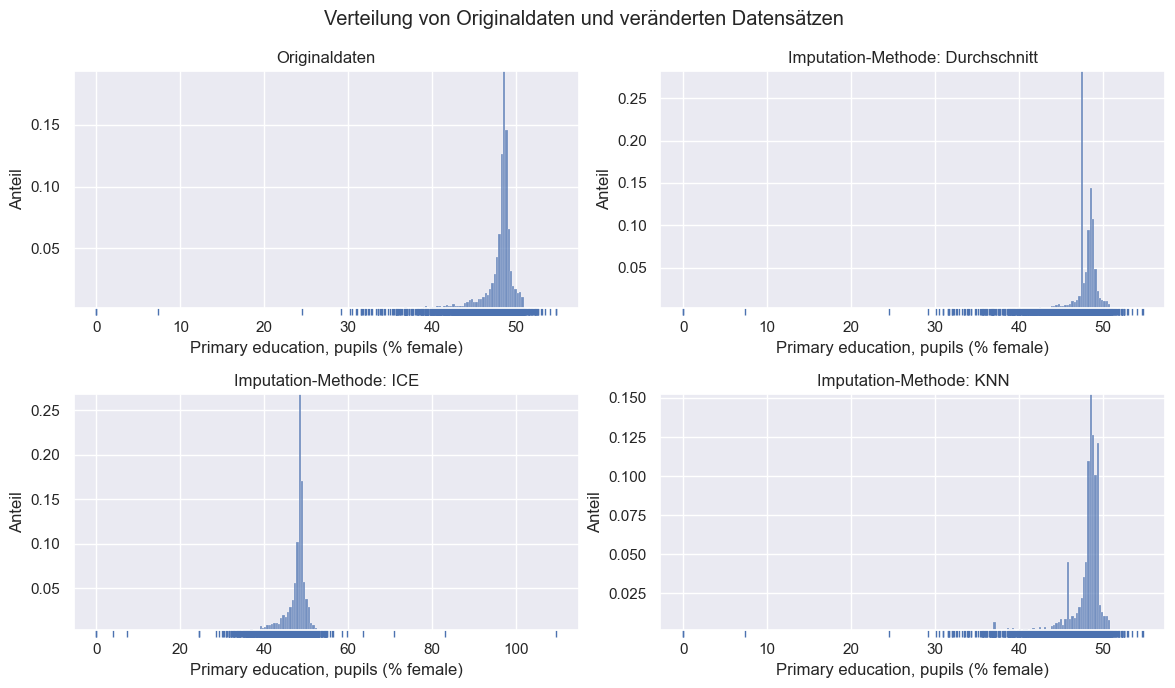

In [7]:
x='Primary education, pupils (% female)'
sns.set_theme()

df_base = base.loc[base['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
df_mean = mean.loc[mean['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
df_ice3 = ice3.loc[ice3['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
df_knn = knn.loc[knn['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(12, 7), nrows=2, ncols=2)


sns.histplot(data=df_base.stack(), bins=200, stat='proportion', legend=False, ax=ax1)
sns.rugplot(data=df_base.stack(), height=-.03, clip_on=False,  ax=ax1)
ax1.set_title('Originaldaten')
ax1.set_ylabel('Anteil')
ax1.set_xlabel(x)

sns.histplot(data=df_mean.stack(), bins=200, stat='proportion', legend=False, ax=ax2)
sns.rugplot(data=df_mean.stack(), height=-.03, clip_on=False, ax=ax2)
ax2.set_title('Imputation-Methode: Durchschnitt')
ax2.set_ylabel('Anteil')
ax2.set_xlabel(x)

sns.histplot(data=df_ice3.stack(), bins=200, stat='proportion', legend=False, ax=ax3)
sns.rugplot(data=df_ice3.stack(), height=-.03, clip_on=False, ax=ax3)
ax3.set_title('Imputation-Methode: ICE')
ax3.set_ylabel('Anteil')
ax3.set_xlabel(x)

sns.histplot(data=df_knn.stack(), bins=200, stat='proportion', legend=False, ax=ax4)
sns.rugplot(data=df_knn.stack(), height=-.03, clip_on=False, ax=ax4)
ax4.set_title('Imputation-Methode: KNN')
ax4.set_ylabel('Anteil')
ax4.set_xlabel(x)

plt.suptitle('Verteilung von Originaldaten und veränderten Datensätzen')
plt.tight_layout()
plt.savefig('figures/density_education')

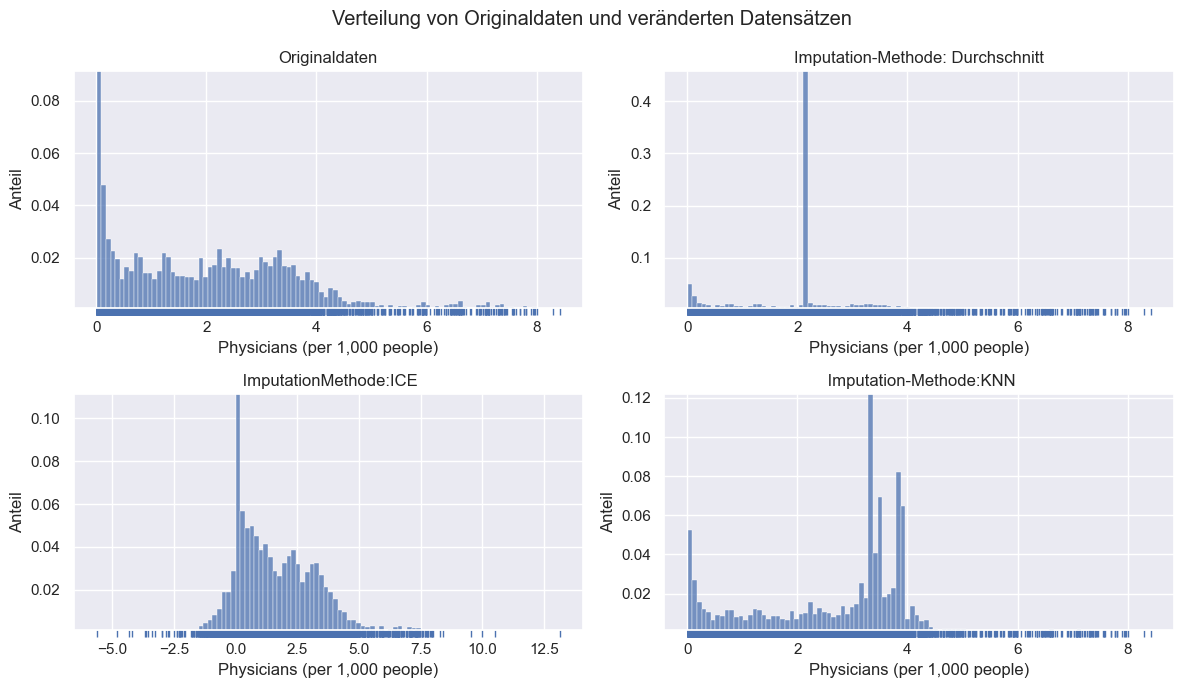

In [8]:
x='Physicians (per 1,000 people)'
sns.set_theme()

df_base = base.loc[base['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
df_mean = mean.loc[mean['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
df_ice3 = ice3.loc[ice3['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
df_knn = knn.loc[knn['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(12, 7), nrows=2, ncols=2)


sns.histplot(data=df_base.stack(), bins=100, stat='proportion', legend=False, ax=ax1)
sns.rugplot(data=df_base.stack(), height=-.03, clip_on=False,  ax=ax1)
ax1.set_title('Originaldaten')
ax1.set_ylabel('Anteil')
ax1.set_xlabel(x)

sns.histplot(data=df_mean.stack(), bins=100, stat='proportion', legend=False, ax=ax2)
sns.rugplot(data=df_mean.stack(), height=-.03, clip_on=False, ax=ax2)
ax2.set_title('Imputation-Methode: Durchschnitt')
ax2.set_ylabel('Anteil')
ax2.set_xlabel(x)

sns.histplot(data=df_ice3.stack(), bins=100, stat='proportion', legend=False, ax=ax3)
sns.rugplot(data=df_ice3.stack(), height=-.03, clip_on=False, ax=ax3)
ax3.set_title(' ImputationMethode:ICE')
ax3.set_ylabel('Anteil')
ax3.set_xlabel(x)

sns.histplot(data=df_knn.stack(), bins=100, stat='proportion', legend=False, ax=ax4)
sns.rugplot(data=df_knn.stack(), height=-.03, clip_on=False, ax=ax4)
ax4.set_title(' Imputation-Methode:KNN')
ax4.set_ylabel('Anteil')
ax4.set_xlabel(x)

plt.suptitle('Verteilung von Originaldaten und veränderten Datensätzen')
plt.tight_layout()
plt.savefig('figures/density_phyicians')

In [34]:
set_names = ['r1','r1_detail','r2','r2_detail', 'r3','r3_detail']
sets = []
for name in set_names:
    sets.append(pd.read_csv(f'additional_data/results/{name}.csv'))
sets = {set_names[i]: sets[i] for i in range(len(sets))}

In [35]:
sets['r1_detail'].columns = ['method', 'run','r2','rmse','still_missing','t']
sets['r2_detail'].columns = ['method', 'run','r2','rmse','still_missing','t']
sets['r3_detail'].columns = ['method', 'run','r2','rmse','still_missing','t']

sets['r1_detail'].run = sets['r1_detail'].run + 1
sets['r2_detail'].run = sets['r2_detail'].run + 1
sets['r3_detail'].run = sets['r3_detail'].run + 1


sets['r1_detail'].set_index(['method', 'run'], inplace=True)
sets['r2_detail'].set_index(['method', 'run'], inplace=True)
sets['r3_detail'].set_index(['method', 'run'], inplace=True)

sets['r1'].columns = ['method', 'r2','RMSE','still_missing','t']
sets['r2'].columns = ['method', 'r2','RMSE','still_missing','t']
sets['r3'].columns = ['method', 'r2','RMSE','still_missing','t']

sets['r1_detail'].still_missing = sets['r1_detail'].still_missing.astype(int)
sets['r2_detail'].still_missing = sets['r2_detail'].still_missing.astype(int)
sets['r3_detail'].still_missing = sets['r3_detail'].still_missing.astype(int)


sets['r1'].set_index('method', inplace=True)
sets['r2'].set_index('method', inplace=True)
sets['r3'].set_index('method', inplace=True)

In [11]:
sets['r1']

,r2,rmse,still_missing,t
method,,,,
Backfill,-1.0942,2.1917,32848.4000,0.7963
Overall Mean,-0.2515,1.8059,0.0000,1.0412
Yearly Mean,0.0100,1.7690,52298.0000,0.8792
Yearly Mean per Region,0.0163,1.7700,58352.6000,0.9921
Interpolate 3,-0.5579,1.9992,32879.0000,0.8617
Interpolate all,-0.5579,1.9669,58.0000,0.8404
ICE 1,0.9487,0.2107,0.0000,9.4209
ICE 2,0.9265,0.4487,0.0000,22.8795
ICE3,0.7037,0.9279,0.0000,82.0135


In [12]:
sets['r2']

,r2,rmse,still_missing,t
method,,,,
Backfill,-0.3128,1.9643,33265.4000,1.1173
Overall Mean,-0.0523,1.7404,0.0000,1.3605
Yearly Mean,0.0148,1.6920,52298.0000,1.2004
Yearly Mean per Region,0.0490,1.6812,58425.0000,1.3096
Interpolate 3,-0.2197,1.9099,33296.8000,1.2033
Interpolate all,-0.2212,1.8800,59.6000,1.1688
ICE 1,0.9860,0.1828,0.0000,9.5502
ICE 2,0.9452,0.3660,0.0000,23.2907
ICE3,0.7851,0.7712,0.0000,81.0282


In [13]:
sets['r3']

,r2,rmse,still_missing,t
method,,,,
Backfill,-1.9567,1.4615,33676.2000,1.4441
Overall Mean,-0.4222,1.0185,0.0000,1.6866
Yearly Mean,0.0036,0.8776,52329.6000,1.5163
Yearly Mean per Region,-0.0679,0.9057,58630.2000,1.6202
Interpolate 3,-0.8911,1.1780,33706.8000,1.5020
Interpolate all,-0.8927,1.1592,58.4000,1.4857
ICE 1,0.9561,0.1664,0.0000,9.8379
ICE 2,0.9582,0.1680,0.0000,23.3889
ICE3,0.7370,0.4527,0.0000,81.5038


In [36]:
sets['r1_detail']

r2   rmse  still_missing        t
method                 run                                       
Backfill               1   -0.2630 3.1265          32924   0.8018
                       2   -2.7753 1.1896          32825   0.7938
                       3   -1.6883 1.0227          32824   0.7935
                       4   -0.6672 2.0859          32841   0.7936
                       5   -0.0772 3.5339          32828   0.7985
Overall Mean           1    0.0567 2.6507              0   1.0423
                       2   -0.7902 0.8096              0   1.0450
                       3   -0.5532 0.7655              0   1.0390
                       4   -0.0900 1.6600              0   1.0365
                       5    0.1190 3.1439              0   1.0430
Yearly Mean            1    0.0090 2.7169          52298   0.8733
                       2   -0.0036 0.6062          52298   0.8894
                       3    0.0254 0.6064          52298   0.8749
                       4    0.0088 1.5830          52298   0.8805
                       5    0.0102 3.3324          52298   0.8779
Yearly Mean per Region 1    0.0432 2.6975          58365   0.9860
                       2   -0.1340 0.6512          58318   1.0029
                       3    0.1422 0.5752          58345   0.9851
                       4   -0.0170 1.6209          58359   0.9987
                       5    0.0471 3.3054          58376   0.9878
Interpolate 3          1   -0.0728 2.8737          32955   0.8654
                       2   -1.5251 0.9771          32855   0.8609
                       3   -0.9307 0.8675          32855   0.8614
                       4   -0.1983 1.7696          32872   0.8664
                       5   -0.0624 3.5082          32858   0.8544
Interpolate all        1   -0.0728 2.8267             58   0.8398
                       2   -1.5250 0.9615             58   0.8449
                       3   -0.9308 0.8535             58   0.8398
                       4   -0.1983 1.7406             58   0.8388
                       5   -0.0623 3.4523             58   0.8383
ICE 1                  1    0.9942 0.2076              0   9.4513
                       2    0.7827 0.2820              0   9.4378
                       3    0.9882 0.0666              0   9.3699
                       4    0.9877 0.1762              0   9.4254
                       5    0.9908 0.3210              0   9.4202
ICE 2                  1    0.8970 0.8759              0  22.7422
                       2    0.9665 0.1108              0  22.9203
                       3    0.8501 0.2378              0  22.9667
                       4    0.9654 0.2959              0  23.0024
                       5    0.9534 0.7234              0  22.7659
ICE3                   1    0.6725 1.5619              0  80.1342
                       2    0.8649 0.2224              0  82.4284
                       3    0.4369 0.4609              0  82.5217
                       4    0.7934 0.7228              0  82.3599
                       5    0.7509 1.6716              0  82.6233
MICE                   1    0.9926 0.2349              0 132.3850
                       2    0.8154 0.2599              0 131.4063
                       3    0.9930 0.0513              0 132.0913
                       4    0.9673 0.2877              0 132.0457
                       5    0.9893 0.3470              0 132.5823
KNN 1                  1    0.5498 1.8312              0 103.6201
                       2    0.1551 0.5562              0 100.8315
                       3    0.3581 0.4921              0 100.6127
                       4    0.0187 1.5751              0 101.9039
                       5    0.2824 2.8373              0 101.9146
KNN 2                  1    0.3851 2.1401              0  17.4701
                       2    0.7765 0.2861              0  17.5054
                       3    0.0182 0.6086              0  17.4726
                       4    0.0398 1.5581              0  17.6183
      

In [32]:
print(sets['r1_detail'].to_latex(longtable=True, caption= 'Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 5% fehlenden Werten.'))

\begin{longtable}{llrrrr}
\caption{Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 5% fehlenden Werten.}\\
\toprule
      &   &      r2 &   rmse &  still\_missing &        t \\
method & run &         &        &                &          \\
\midrule
\endfirsthead
\caption[]{Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 5% fehlenden Werten.} \\
\toprule
      &   &      r2 &   rmse &  still\_missing &        t \\
method & run &         &        &                &          \\
\midrule
\endhead
\midrule
\multicolumn{6}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
Backfill & 0 & -0.2630 & 3.1265 &          32924 &   0.8018 \\
      & 1 & -2.7753 & 1.1896 &          32825 &   0.7938 \\
      & 2 & -1.6883 & 1.0227 &          32824 &   0.7935 \\
      & 3 & -0.6672 & 2.0859 &          32841 &   0.7936 \\
      & 4 & -0.0772 & 3.5339 &          32828 &   0.7985 \\
Overall Mean & 0 &  0.0567 & 2.6507 &              0 &   1.0423 \\
      &

C:\Users\mbfbr\AppData\Local\Temp\ipykernel_10888\1089935598.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sets['r1_detail'].to_latex(longtable=True, caption= 'Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 5% fehlenden Werten.'))
